In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset
data = pd.read_csv('dataset.csv')


In [8]:
data.head()

,quarter,SER_REF,industry_code,industry_name,filled jobs,filled jobs revised,filled jobs diff,filled jobs % diff,total_earnings,total earnings revised,earnings diff,earnings % diff
0,2020.09,BDCQ.SEA1AA,A,"Agriculture, Forestry and Fishing",93195,93706,511,0.5,1205,1212,7,0.6
1,2020.09,BDCQ.SEA1BA,B,Mining,5340,5355,15,0.3,145,145,0,0.0
2,2020.09,BDCQ.SEA1CA,C,Manufacturing,217139,218967,1828,0.8,3791,3823,32,0.8
3,2020.09,BDCQ.SEA1DA,D,"Electricity, Gas, Water and Waste S",19886,20060,174,0.9,493,498,5,1.0
4,2020.09,BDCQ.SEA1EA,E,Construction,166413,168095,1682,1.0,2873,2906,33,1.1


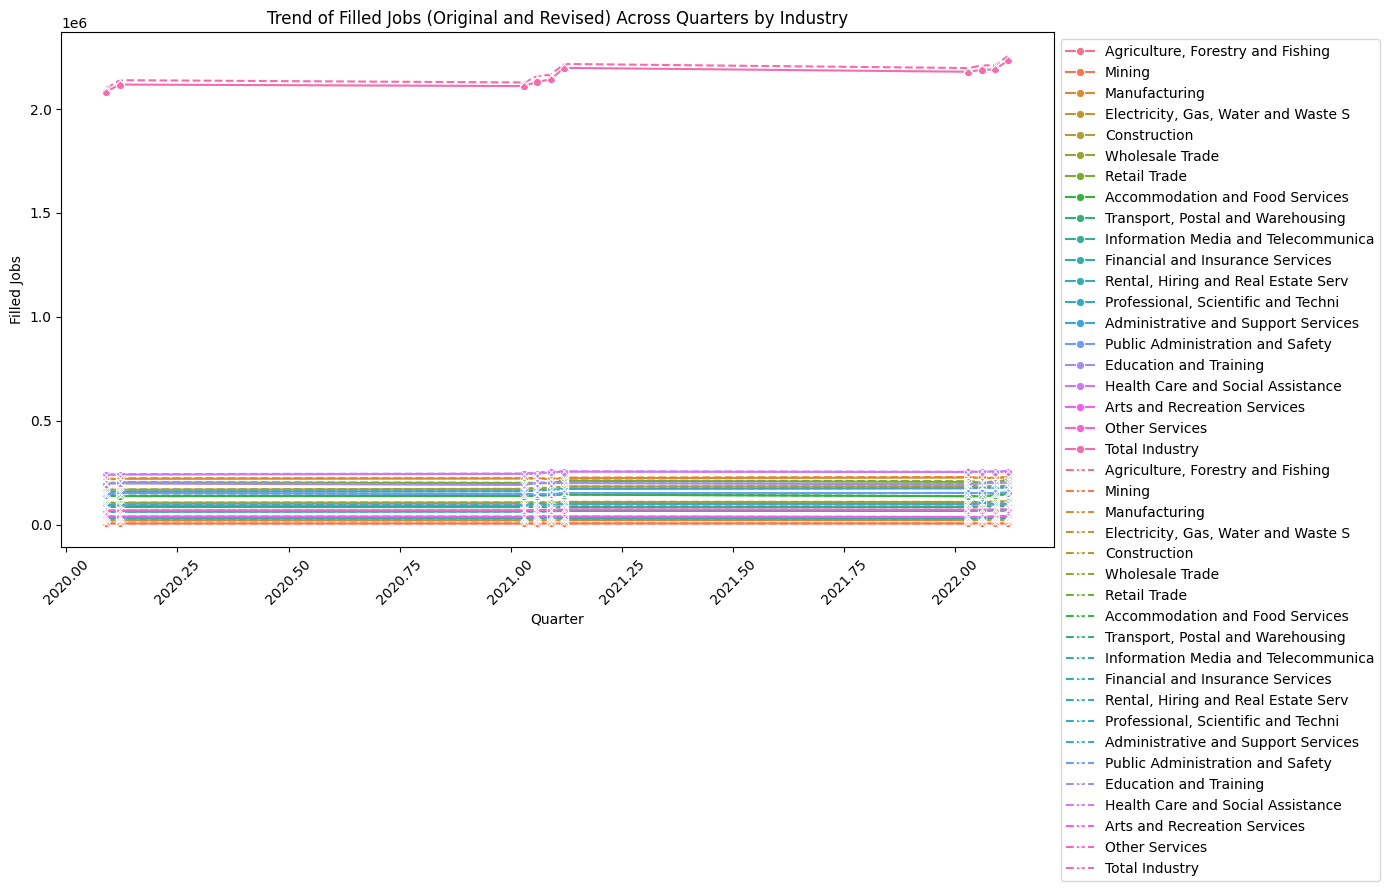

In [10]:
plt.figure(figsize=(14, 8))

# Plot original filled jobs
sns.lineplot(
    x='quarter', 
    y='filled jobs', 
    hue='industry_name', 
    data=data, 
    marker='o'
)

# Plot revised filled jobs with dashed lines and different markers
sns.lineplot(
    x='quarter', 
    y='filled jobs revised', 
    hue='industry_name', 
    data=data, 
    marker='x', 
    linestyle='--'
)

plt.title('Trend of Filled Jobs (Original and Revised) Across Quarters by Industry')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Push legend outside the plot
plt.ylabel('Filled Jobs')
plt.xlabel('Quarter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


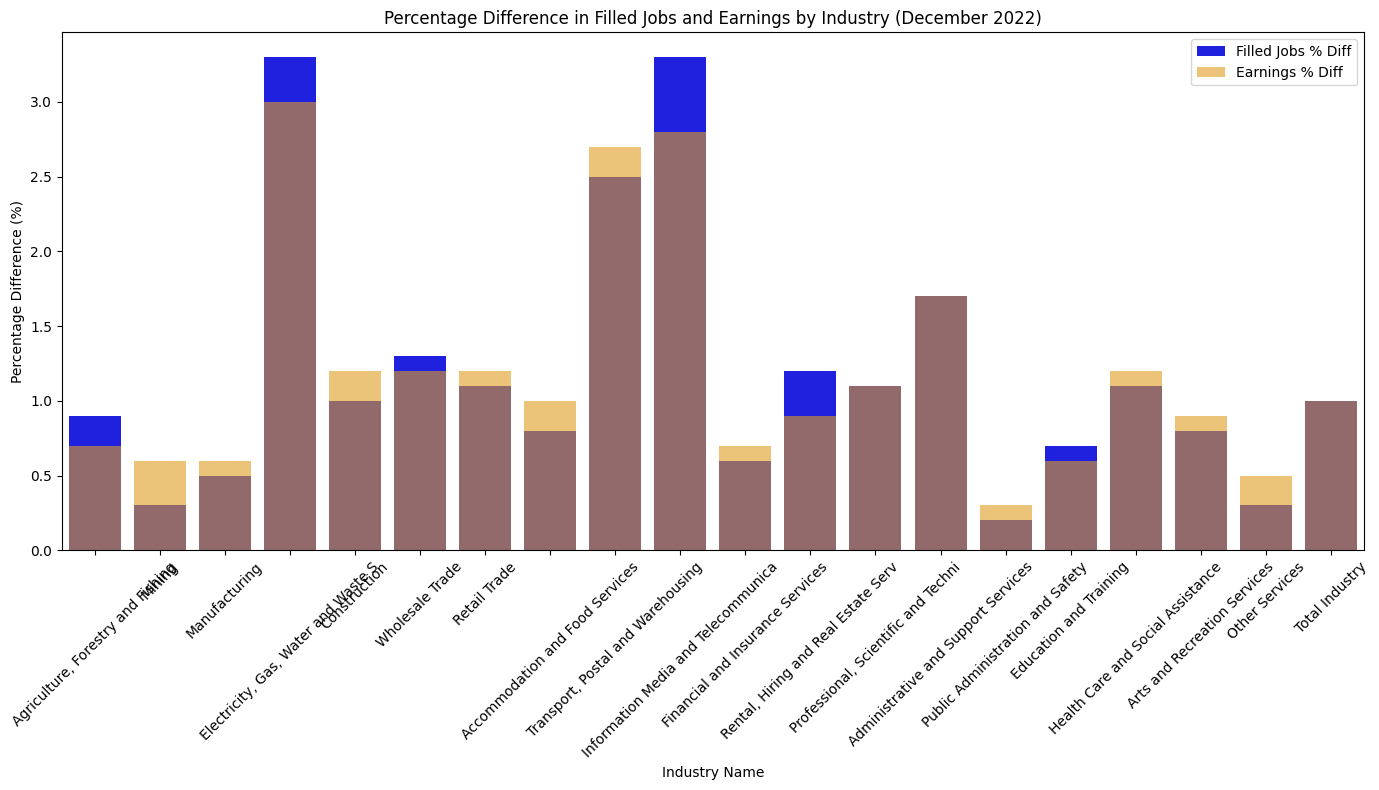

In [ ]:
# Bar plot highlighting the percentage difference in filled jobs and earnings for each industry in December 2022
dec_2022_data = data[data['quarter'] == 2022.12]
plt.figure(figsize=(14, 8))
sns.barplot(x='industry_name', y='filled jobs % diff', data=dec_2022_data, color='blue', label='Filled Jobs % Diff')
sns.barplot(x='industry_name', y='earnings % diff', data=dec_2022_data, color='orange', label='Earnings % Diff', alpha=0.6)
plt.title('Percentage Difference in Filled Jobs and Earnings by Industry (December 2022)')
plt.legend()
plt.ylabel('Percentage Difference (%)')
plt.xlabel('Industry Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

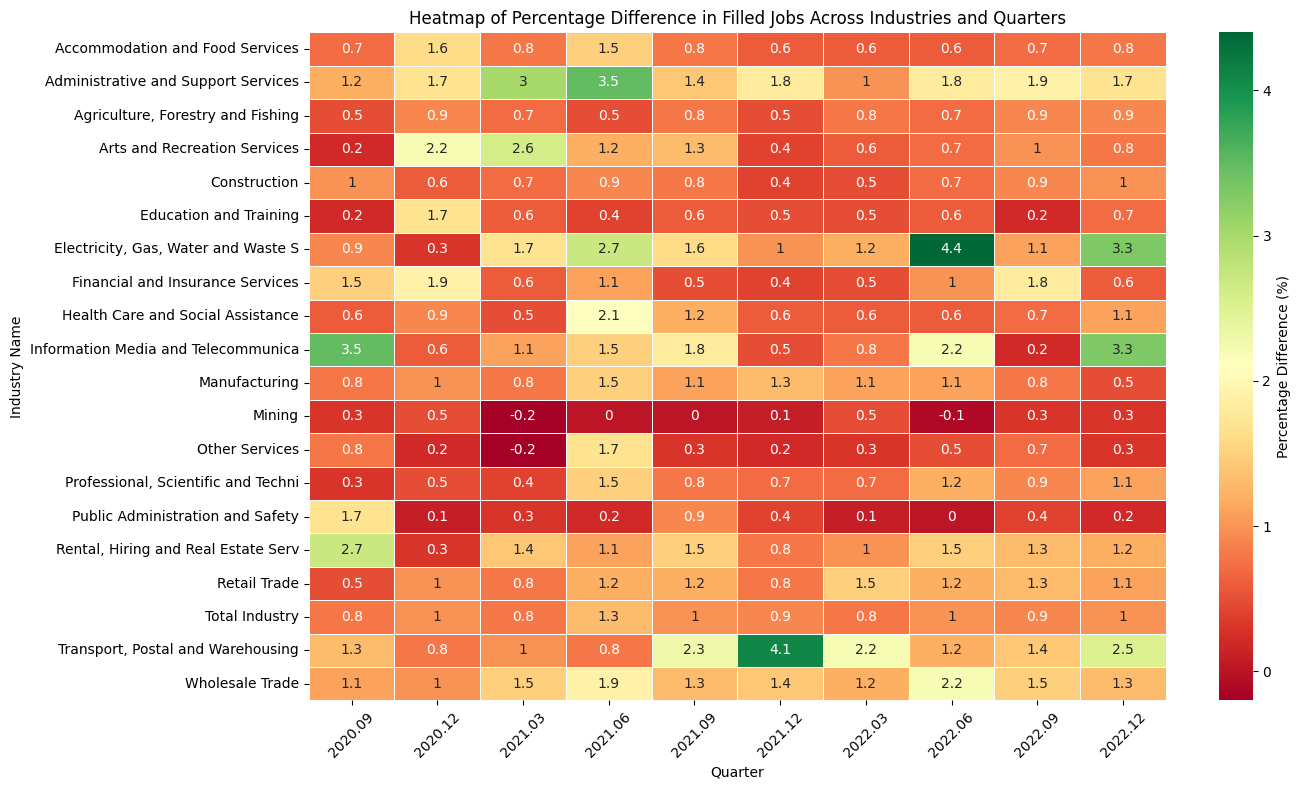

In [ ]:
# 3. Heatmap showing the percentage difference in filled jobs across industries and quarters
heatmap_data = data.pivot_table(index='industry_name', columns='quarter', values='filled jobs % diff')
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='RdYlGn', annot=True, linewidths=.5, cbar_kws={'label': 'Percentage Difference (%)'})
plt.title('Heatmap of Percentage Difference in Filled Jobs Across Industries and Quarters')
plt.ylabel('Industry Name')
plt.xlabel('Quarter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()